#### Import Necessary Libraries

In [1]:
import os
os.chdir(r"C:\Users\thars\Downloads")

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

There are different categories in the dataset, lets start from time series analysis and sales forecasting of furniture.

In [2]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

##### Data Preprocessing

In [3]:
#Data preprocessing includes removing columns that don't need
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 
        'Customer ID', 'Customer Name', 
        'Segment', 'Country', 'City', 'State', 
        'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [4]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

#indexing Time Series Data
furniture = furniture.set_index('Order Date')
furniture.index

#The current DateTime looks a little challenging to work within the dataset, so I will use the price of 
# each day sales on average of the month for maintaining it simple. I will use the start of each month as a timestamp.
y = furniture['Sales'].resample('MS').mean()

#### Visualizing the Fruniture Sales Data


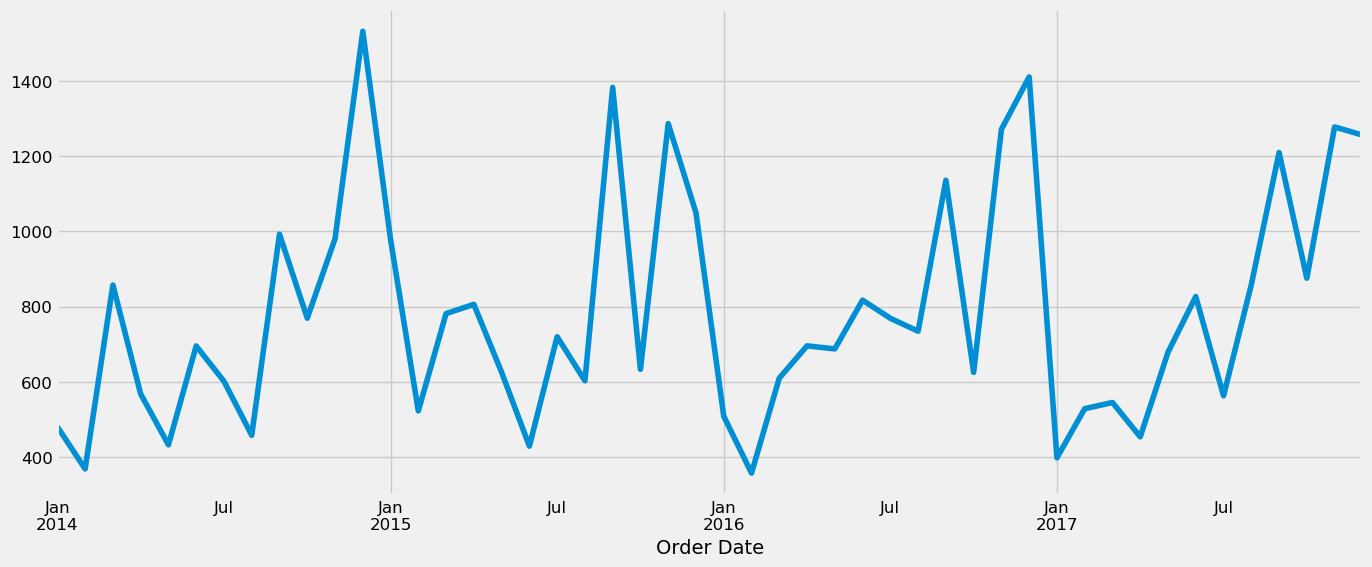

In [5]:
y.plot(figsize=(15, 6))
plt.show()

#### Decomposition

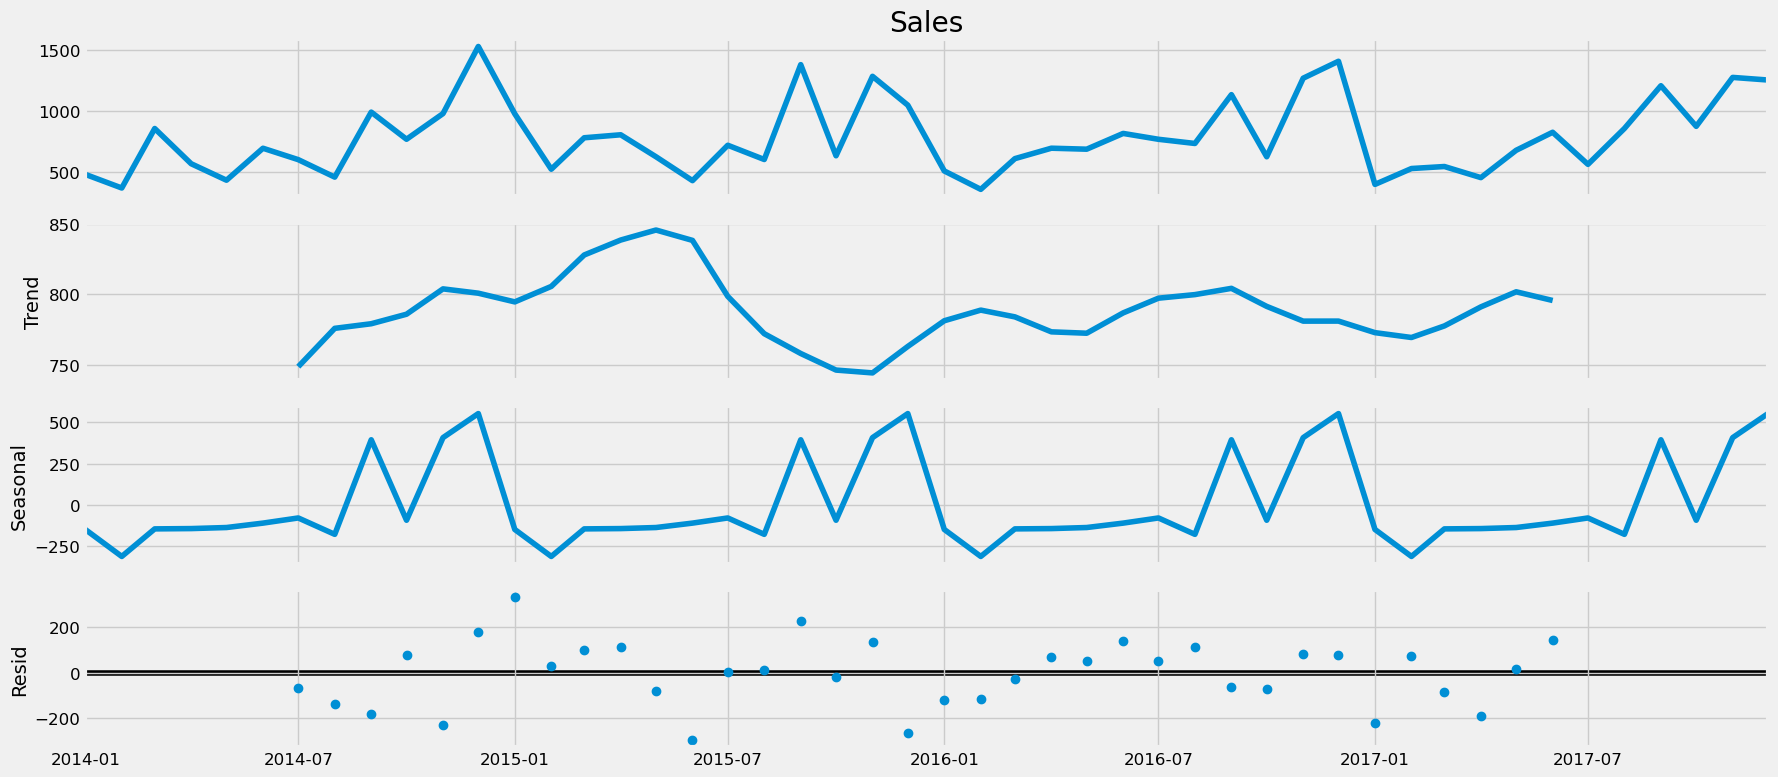

In [6]:
#Let's decompose our data into Trend, Season, Noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


##### Time Series Forecasting with ARIMA(Auto Regressive Integrated Moving Average)

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
#This step is the process of selection of parameters in our Time Series Forecasting model for furniture sales.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                y,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1567.4749364167214
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793568
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:478.27925331444305
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803027265
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758109
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2792.7305904497425
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809151


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673286
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5910637670013


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:467.5616452328524
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576520697
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1702.9809434449971
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672393664


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167958
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1391.4751380805899
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151422
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817279


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1431.0304781678337
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482669
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.58062333387767
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442628


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1942.4049576698933
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173653
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612333
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1533.1878380728424
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160941
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935198
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:479.7837403343145
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750845866
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143883
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185849


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2354.027677391038
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815127
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965922
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238771126


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:468.1895912739154
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002130148
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.751318811322
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1487.8093217957726
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619099
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587857537
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1480.827512956423
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345419
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992507967
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835422
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:316.3558250046914
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610315
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939381
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608466


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2147.2528056755345
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.787543953735
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661014415818


##### Fitting SARIMA Model

In [9]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


In [10]:
#Now I will run Model diagnosis; running a model diagnosis is essential in Time Series 
# Forecasting to investigate any unusual behavior in the model.
results.plot_diagnostics(figsize=(15, 5))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1500x500 with 0 Axes>

##### Validating Time Series Forecasts

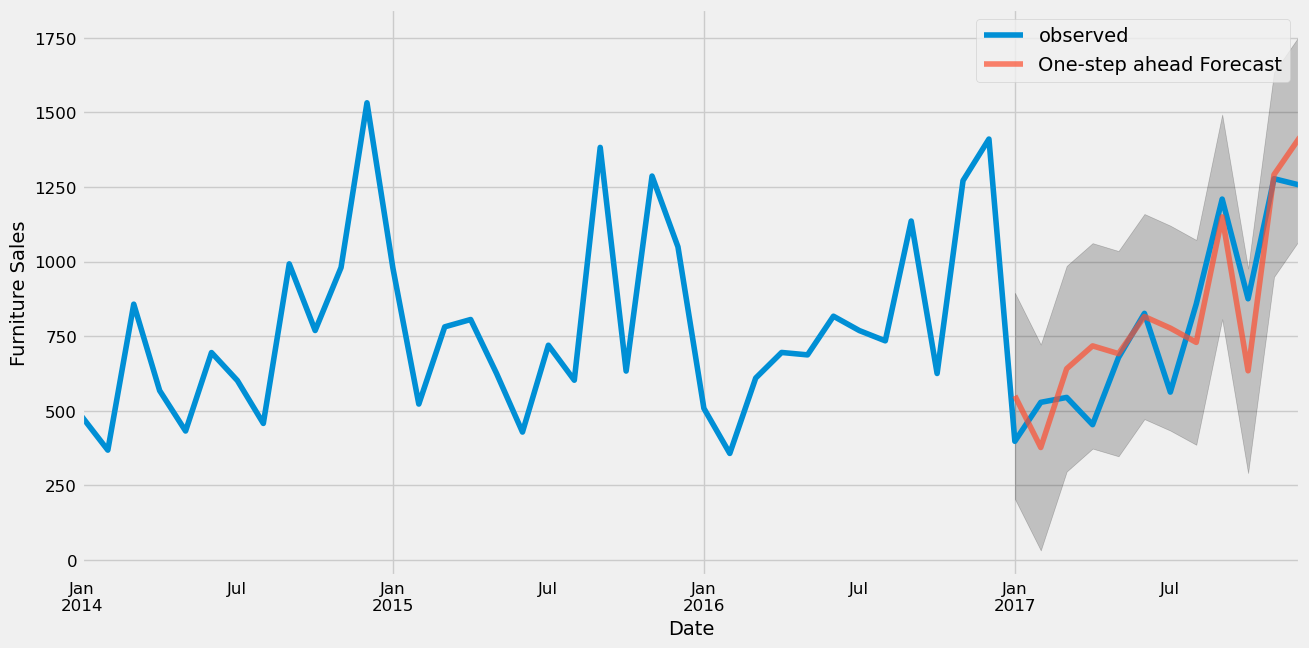

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.57


In [ ]:
pred.predicted_mean

Order Date
2017-01-01     550.097002
2017-02-01     376.886390
2017-03-01     640.883891
2017-04-01     717.478279
2017-05-01     691.391035
2017-06-01     815.731948
2017-07-01     776.952506
2017-08-01     729.182642
2017-09-01    1149.878737
2017-10-01     633.943207
2017-11-01    1291.341429
2017-12-01    1417.169384
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
print("The Root Mean Squared Error of our forecasts is {}".format(round(np.sqrt(mse))))

The Root Mean Squared Error of our forecasts is 152


##### Producing and visualizing forecasts

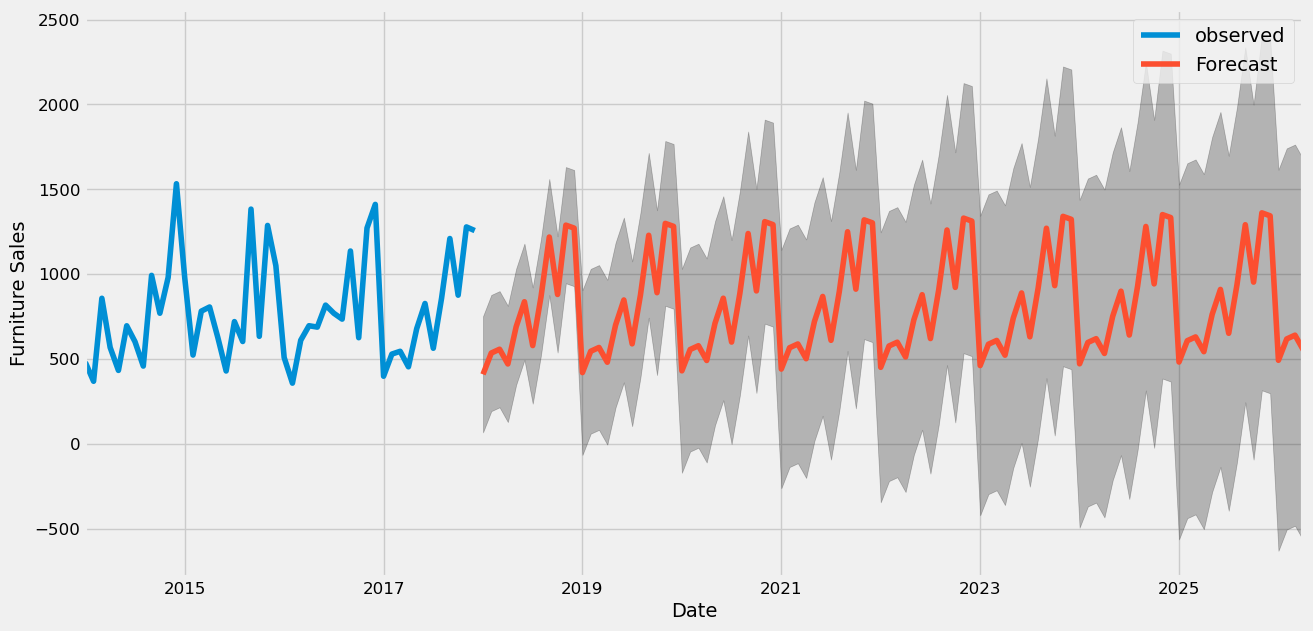

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()